In [10]:
#import all the stuff you need
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache
from allensdk.brain_observatory.ecephys import ecephys_session

# uncomment if you wanna use the tranfer entropy measure
import sys
testdir = os.getcwd() # os.path.dirname(__file__)
import smite

# fix slow autocomplete
%config Completer.use_jedi = False
%matplotlib inline

import platform
platstring = platform.platform()

if 'Darwin' in platstring:
    # OS X 
    data_root = "/Volumes/Brain2019/"
elif 'Windows'  in platstring:
    # Windows (replace with the drive letter of USB drive)
    data_root = "E:/"
elif ('amzn1' in platstring):
    # then on AWS
    data_root = "/data/"
else:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_root = "/media/$USERNAME/Brain2019/"
    data_root = "/run/media/tom.chartrand/Brain2019"

manifest_path = os.path.join(data_root, "dynamic-brain-workshop/visual_coding_neuropixels/2019/manifest.json")

 
cache = EcephysProjectCache.fixed(manifest=manifest_path)

from aux_fun import get_binned_spike_trains, get_binned_spike_trains_sorted
from sanity_check import sanity_check




In [11]:


session_id=737581020
stim_type='drifting_gratings'#''#'spontaneous'natural_scenes''drifting_gratings
time_step = 1/100


In [12]:
import pickle

import matplotlib.pyplot as plt

corr_mat = pickle.load(open(str('corr_mat_' + stim_type + 'session_' + str(session_id) +'.pkl'),'rb'))

['the size of your matrix is(35, 35, 9)']


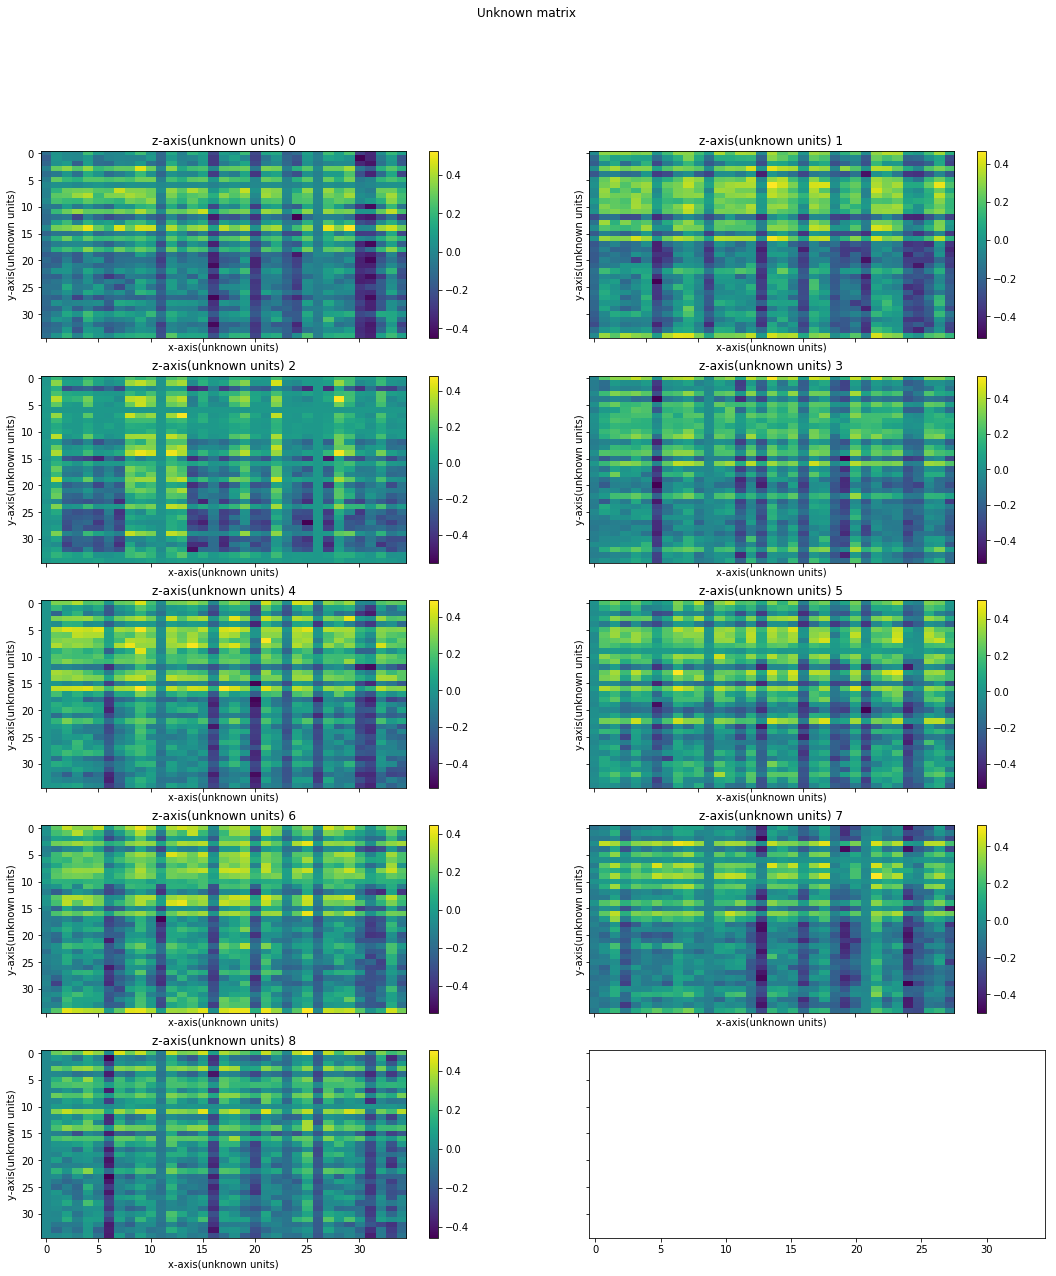

In [14]:
sanity_check(corr_mat[:35,:35], ncols=2)

In [5]:
V1_units = pickle.load(open(str('V1_clusters' + stim_type + 'session_' + str(session_id) +'.pkl'),'rb'))
V1_units.head()

,PT_ratio,amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,l_ratio,...,structure_id,probe_horizontal_position,probe_id,probe_vertical_position,probe_description,location,sampling_rate,lfp_sampling_rate,Row_number,cluster
unit_id,,,,,,,,,,,,,,,,,,,,,
914615132,0.340521,49.533120,0.034790,467,368.04,3.883598,1.226418,0.327738,39.236432,0.046510,...,385.0,27,757988391,3240,probeC,,29999.998448,2499.999871,6,0
914615240,0.263063,47.705385,0.039381,521,292.67,3.467218,2.485168,0.239449,51.954025,0.018182,...,385.0,11,757988391,3220,probeC,,29999.998448,2499.999871,7,2
914615116,0.156496,53.904045,0.013805,459,105.45,3.723802,10.710719,0.030079,74.287969,0.013771,...,385.0,43,757988391,3220,probeC,,29999.998448,2499.999871,8,0
914615102,0.384715,200.737875,0.001206,452,143.61,4.983356,0.775855,0.000000,70.389660,0.000515,...,385.0,59,757988391,3160,probeC,,29999.998448,2499.999871,16,1
914615092,0.507623,56.373330,0.014300,447,200.40,3.983247,9.090181,0.132736,72.043371,0.018004,...,385.0,43,757988391,3140,probeC,,29999.998448,2499.999871,17,0


In [6]:
corr_mat[0,0,0]

0.28090032386679475

['the size of your matrix is(40, 147)']


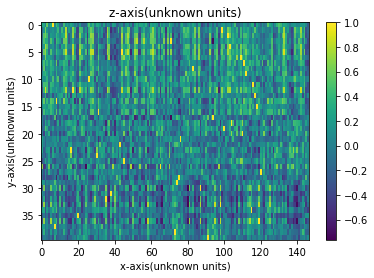

In [7]:
clusters = V1_units['cluster'].values
sort_ind= np.argsort(clusters)

sanity_check(corr_mat[sort_ind,:,0])




In [8]:
def pca_clustering(mat,clusters=3):

    from sklearn.decomposition import PCA
    pca = PCA(n_components=20)
    pca.fit(mat[:,:])
    pca.explained_variance_
    print(pca.explained_variance_ratio_)
    pca.components_ #eigenvectors
    X_project = pca.fit_transform(mat[:,:])
    max_pc = 3
    X_project.shape
    from sklearn.cluster import KMeans
    from scipy import stats

    kmeans = KMeans(n_clusters=clusters).fit(X_project[:,:clusters])
    cluster_ids = kmeans.labels_
    return cluster_ids


In [9]:
labels = np.empty([corr_mat.shape[0],9])
for itrial in range(9):

    labels[:,itrial] = pca_clustering(corr_mat[:,:,itrial]);

sort_ind= np.argsort(labels[:,0])    
sanity_check(labels[sort_ind,:])




[0.38843817 0.28970834 0.10811633 0.04972542 0.03553708 0.01980467
 0.01881917 0.01781686 0.01618321 0.01054986 0.00968124 0.00780042
 0.00508741 0.00475735 0.00385291 0.00350034 0.00289335 0.00267643
 0.00149822 0.0010669 ]


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
avg_corr_mat = np.mean(corr_mat,axis=2)
plt.imshow(avg_corr_mat, cmap = 'PiYG', aspect = 'auto')
plt.colorbar()

In [ ]:
avg_labels = pca_clustering(avg_corr_mat[:,:],clusters=3);

sort_ind_avg= np.argsort(avg_labels)    


In [ ]:

plt.imshow(avg_corr_mat[sort_ind_avg,:], cmap = 'PiYG', aspect = 'auto')
plt.colorbar()

In [ ]:
V1_units